In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## 1.Noise Function

In [ ]:
def addNoiseToMNIST(yNoise,data):
    """Adds random noise to raw MNIST images
    Inputs: added random noise distribution from 0 to upper bound, yNoise
            raw MNIST image data, data
    Outputs: MNIST data with added noise, MNISTwithNoise """
    noise = np.random.uniform(0,yNoise,data.shape) #creating an array of noise values the same shape as the data
    MNISTwithNoise = data + noise #adding each noise value to corresponding data point
    MNISTwithNoise = np.clip(MNISTwithNoise,0,255) #any pixel with value >255 is clipped to be 255
    return MNISTwithNoise

### 2.Plotting Image

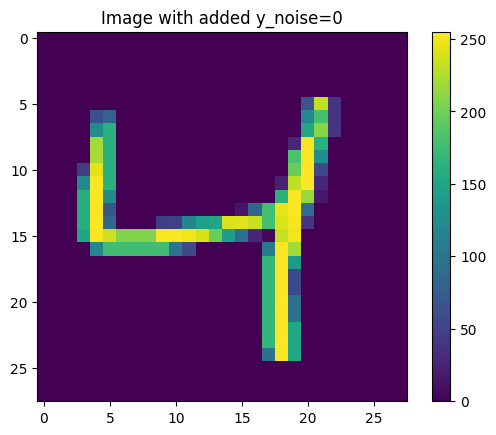

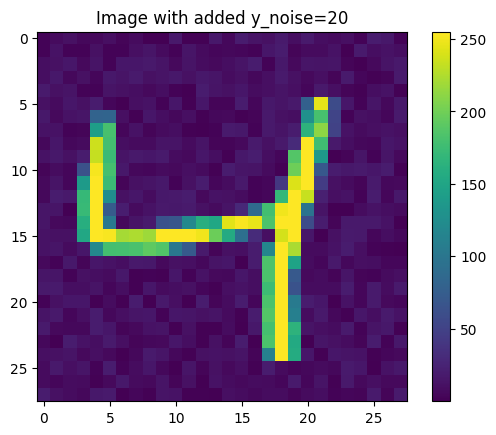

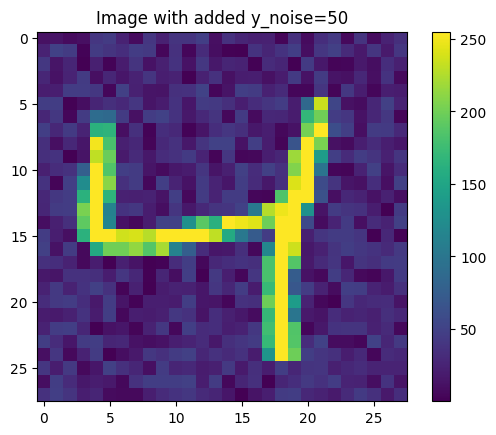

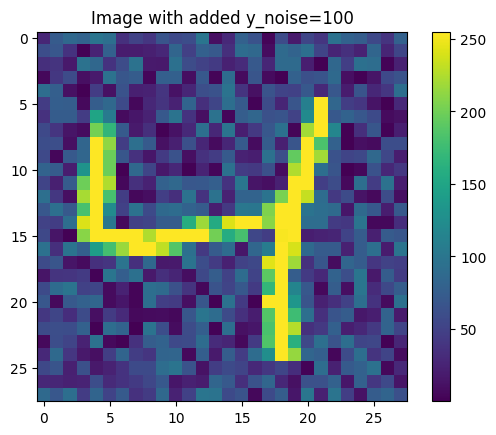

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #Loading MNIST data
image = train_images[2] #selecing a MNIST image
noise = np.array([0,20,50,100]) #y noise values

for n in noise:
  noisyImage = addNoiseToMNIST(n,image) #adding noise to image
  plt.figure()
  plt.imshow(noisyImage)
  plt.title(f"Image with added y_noise={n}")
  plt.colorbar()


## 3.Training Neural Network

In [ ]:
train_images=train_images.astype('float32') #converting image data to float 32 so they can be normaised
test_images=test_images.astype('float32')
train_images /= 255 # normalising images in range 0 to 1
test_images /= 255
#defining model
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)), #28x28 MNIST image input
    keras.layers.Flatten(), #converting 2d image input to 1d array
    keras.layers.Dense(128,activation='relu'), #128 neuron hidden layer
    keras.layers.Dense(10)]) #10 neuron output, one for each digit
#compiling model
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Our loss function & converting raw logits to probabilities via softmax
optimizer=tf.keras.optimizers.SGD(learning_rate=1.0) #Stochastic Gradient Descent optimiser to minimise the loss function
model.compile(loss=loss, optimizer=optimizer ,metrics=['accuracy']) #compiling model
#training model
history=model.fit(train_images, train_labels,batch_size=100, epochs=30)
#testing model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) #calcualting model predictions, then comparing to image labels to get accuracy
print(f"Test accuracy = {test_acc}")
#showing specific cases to check results
predictions = model.predict(test_images) #calculating arrays of logits for each image
predicted_digit = np.argmax(predictions, axis=1) #converting highest value logit into corresponding digit
for i in range(10):
    print(f"Model Predicted Digit = {predicted_digit[i]}, True label = {test_labels[i]}")

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7771 - loss: 0.7765
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9529 - loss: 0.1542
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9658 - loss: 0.1117
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9724 - loss: 0.0907
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9762 - loss: 0.0771
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9794 - loss: 0.0646
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9819 - loss: 0.0594
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9840 - loss: 0.0502
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9843 - loss: 0.0489
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9868 - loss: 0.0407
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9886 - loss: 0.0351
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

## 4. Plot of test accuracy vs y noise

313/313 - 0s - 1ms/step - accuracy: 0.9756 - loss: 0.1262
Y Noise = 0.0, Test Accuracy = 0.975600004196167
313/313 - 0s - 1ms/step - accuracy: 0.9702 - loss: 0.1479
Y Noise = 20.0, Test Accuracy = 0.9702000021934509
313/313 - 0s - 1ms/step - accuracy: 0.9138 - loss: 0.3839
Y Noise = 50.0, Test Accuracy = 0.9138000011444092
313/313 - 0s - 1ms/step - accuracy: 0.6884 - loss: 2.0141
Y Noise = 100.0, Test Accuracy = 0.6883999705314636


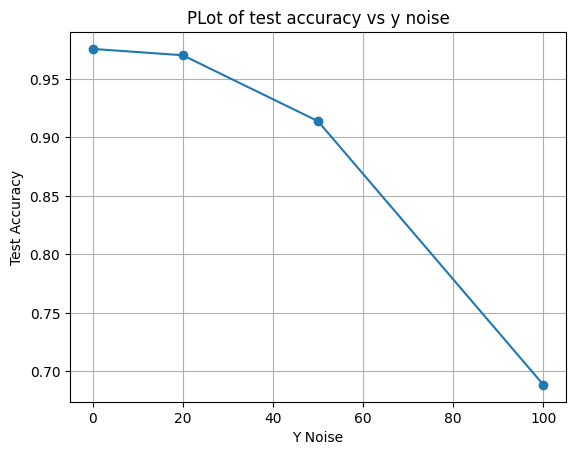

In [ ]:
normalised_noise=noise/255 #scaling down noise to match data
test_acc_array=[] #initialising results array

for n in normalised_noise:
  noisyImages=addNoiseToMNIST(n,test_images) #adding noise to data
  test_loss_noisy, test_acc_noisy = model.evaluate(noisyImages,  test_labels, verbose=2) #Evaluating model accaurcy
  test_acc_array.append(test_acc_noisy)  #adding to results array
  print(f"Y Noise = {n*255}, Test Accuracy = {test_acc_noisy}")

plt.plot(noise, test_acc_array, linestyle="-", marker='o') #plotting test accuracy vs noise
plt.title("PLot of test accuracy vs y noise")
plt.xlabel("Y Noise")
plt.ylabel("Test Accuracy")
plt.grid()

## 5. Retraining network with noise
I  have retrained each network with 0,20,50 and 100 noise, then tested on images with no added noise

In [ ]:
for n in normalised_noise:
  noisy_train_images = addNoiseToMNIST(n,train_images) #adding noise to training images
  model = keras.Sequential([ #redefining model to ensure starting from random weights
    keras.layers.Input(shape=(28,28)), #28x28 MNIST image input
    keras.layers.Flatten(), #converting 2d image input to 1d array
    keras.layers.Dense(128,activation='relu'), #128 neuron hidden layer
    keras.layers.Dense(10)]) #10 neuron output, one for each digit
  #compiling model
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Our loss function & converting raw logits to probabilities via softmax
  optimizer=tf.keras.optimizers.SGD(learning_rate=1.0) #Stochastic Gradient Descent optimiser to minimise the loss function
  model.compile(loss=loss, optimizer=optimizer ,metrics=['accuracy']) #compiling model
  history=model.fit(noisy_train_images, train_labels,batch_size=100, epochs=30) #training using noisy images
  test_loss_noisy , test_acc_noisy = model.evaluate(test_images, test_labels, verbose=2)
  print(f"Noise = {n*255} Test accuracy = {test_acc_noisy}")

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8017 - loss: 0.6307
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9608 - loss: 0.1287
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9719 - loss: 0.0910
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9771 - loss: 0.0728
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9805 - loss: 0.0619
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9833 - loss: 0.0507
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9863 - loss: 0.0420
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9877 - loss: 0.0381
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9901 - loss: 0.0300
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9910 - loss: 0.0280
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9909 - loss: 0.0261
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

## 6.Conclusion
I am defining performance by a combination of the model's overall accuarcy and its resilliance to added noise. As the noise level of the training images increases, the model's accuracy decreases with 0 noise = 0.979, 20 noise = 0.966, 50 noise = 0.133, and 100 noise = 0.108. I think the best ammount of noise to add to the training dataset is 20.0, as it makes a less than 1% difference to the test accuracy, but has the advantage of being more reliable with identifying noisy test images compared to the model trained without noise.